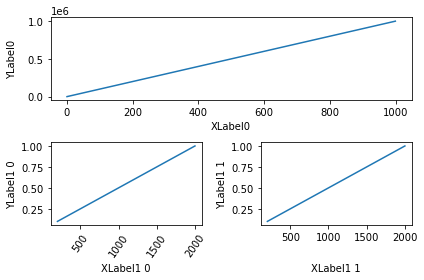

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, :])
ax.plot(np.arange(0, 1e6, 1000))
ax.set_ylabel('YLabel0')
ax.set_xlabel('XLabel0')

for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    ax.plot(np.arange(1., 0., -0.1) * 2000., np.arange(1., 0., -0.1))
    ax.set_ylabel('YLabel1 %d' % i)
    ax.set_xlabel('XLabel1 %d' % i)
    if i == 0:
        for tick in ax.get_xticklabels():
            tick.set_rotation(55)
fig.align_labels()

In [4]:
import os
import requests
def download(url: str, dest_folder: str):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder)
    filename = url.split('/')[-1].replace(" ", "_")
    file_path = os.path.join(dest_folder, filename)
    r = requests.get(url, stream=True)
    if r.ok:
        print("saving to", os.path.abspath(file_path))
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 8):
                if chunk:
                    f.write(chunk)
                    f.flush()
                    os.fsync(f.fileno())
    else:
        print("Download failed: status code {}\n{}".format(r.status_code, r.text))
url_to_titanic_data = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
download(url_to_titanic_data,'./data')

saving to C:\Users\yangshuxuan\Euclid\data\titanic.csv


In [13]:
%matplotlib ipympl

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

fig, main_ax = plt.subplots()
main_ax.plot(t, s)
main_ax.set_xlim(0, 1)
main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
main_ax.set_xlabel('time (s)')
main_ax.set_ylabel('current (nA)')
main_ax.set_title('Gaussian colored noise')

# this is an inset axes over the main axes
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set_title('Probability')
right_inset_ax.set_xticks([])
right_inset_ax.set_yticks([])

# this is another inset axes over the main axes
left_inset_ax = fig.add_axes([.2, 0.6, .2, .2], facecolor='k')
left_inset_ax.plot(t[:len(r)], r)
left_inset_ax.set_title('Impulse response')
left_inset_ax.set_xlim(0, 0.2)
left_inset_ax.set_xticks([])
left_inset_ax.set_yticks([])

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
fig.add_axes?

Signature: fig.add_axes(*args, **kwargs)
Docstring:
Add an axes to the figure.

Call signatures::

    add_axes(rect, projection=None, polar=False, **kwargs)
    add_axes(ax)

Parameters
----------
rect : sequence of float
    The dimensions [left, bottom, width, height] of the new axes. All
    quantities are in fractions of figure width and height.

projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
    The projection type of the `~.axes.Axes`. *str* is the name of
    a custom projection, see `~matplotlib.projections`. The default
    None results in a 'rectilinear' projection.

polar : bool, default: False
    If True, equivalent to projection='polar'.

sharex, sharey : `~.axes.Axes`, optional
    Share the x or y `~matplotlib.axis` with sharex and/or sharey.
    The axis will have the same limits, ticks, and scale as the axis
    of the shared axes.

label : str
    A label for the returned axes.

Returns
-------
`~.axes.Axes`, o

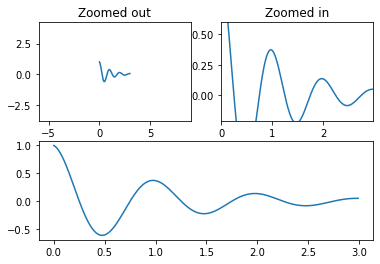

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [14]:
y, x = np.mgrid[:5, 1:6]
poly_coords = [
    (0.25, 2.75), (3.25, 2.75),
    (2.25, 0.75), (0.25, 0.75)
]
fig, (ax1, ax2) = plt.subplots(ncols=2)

# Here we set the stickiness of the axes object...
# ax1 we'll leave as the default, which uses sticky edges
# and we'll turn off stickiness for ax2
ax2.use_sticky_edges = False

for ax, status in zip((ax1, ax2), ('Is', 'Is Not')):
    cells = ax.pcolor(x, y, x+y, cmap='inferno',shading='auto')  # sticky
    ax.add_patch(
        plt.Polygon(poly_coords, color='forestgreen', alpha=0.5)
    )  # not sticky
    ax.margins(x=0.1, y=0.05)
    ax.set_aspect('equal')
    ax.set_title('{} Sticky'.format(status))

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create a figure
fig = plt.figure()

# Create a subplot
ax = fig.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Simple plot')

In [17]:
import matplotlib.gridspec as gridspec
plt.rcParams['savefig.facecolor'] = "0.8"
def example_plot(ax, fontsize=12):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    ax.set_xlabel('x-label', fontsize=fontsize)
    ax.set_ylabel('y-label', fontsize=fontsize)
    ax.set_title('Title', fontsize=fontsize)
plt.close('all')
fig = plt.figure()

gs1 = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

example_plot(ax1)
example_plot(ax2)
gs1.tight_layout(fig)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [18]:
import matplotlib
matplotlib.get_configdir()

'C:\\Users\\yangshuxuan\\.matplotlib'

In [21]:
import matplotlib.pyplot as plt
plt.style.use('C:\\Users\\yangshuxuan\\.matplotlib\\stylelib\\presentation.mplstyle')